In [6]:
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
from matplotlib.pyplot import MultipleLocator
from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['Songti SC']

## 官方示例

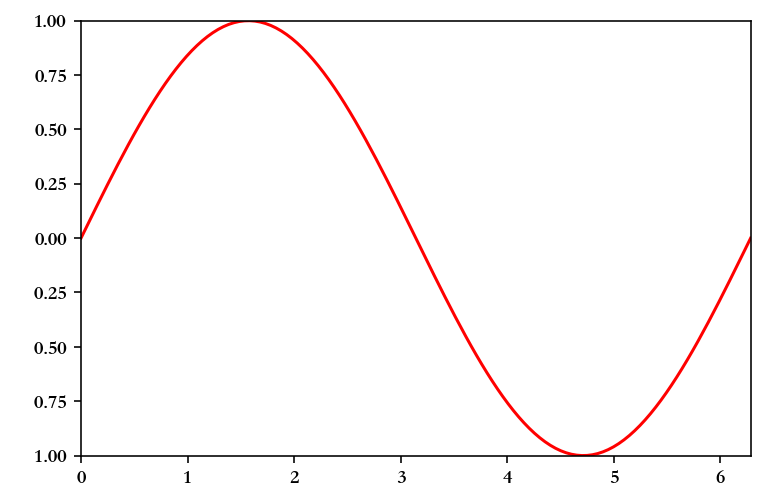

In [13]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)


HTML(ani.to_jshtml())

## 动态图

In [2]:
df = pd.read_csv('数据.csv')

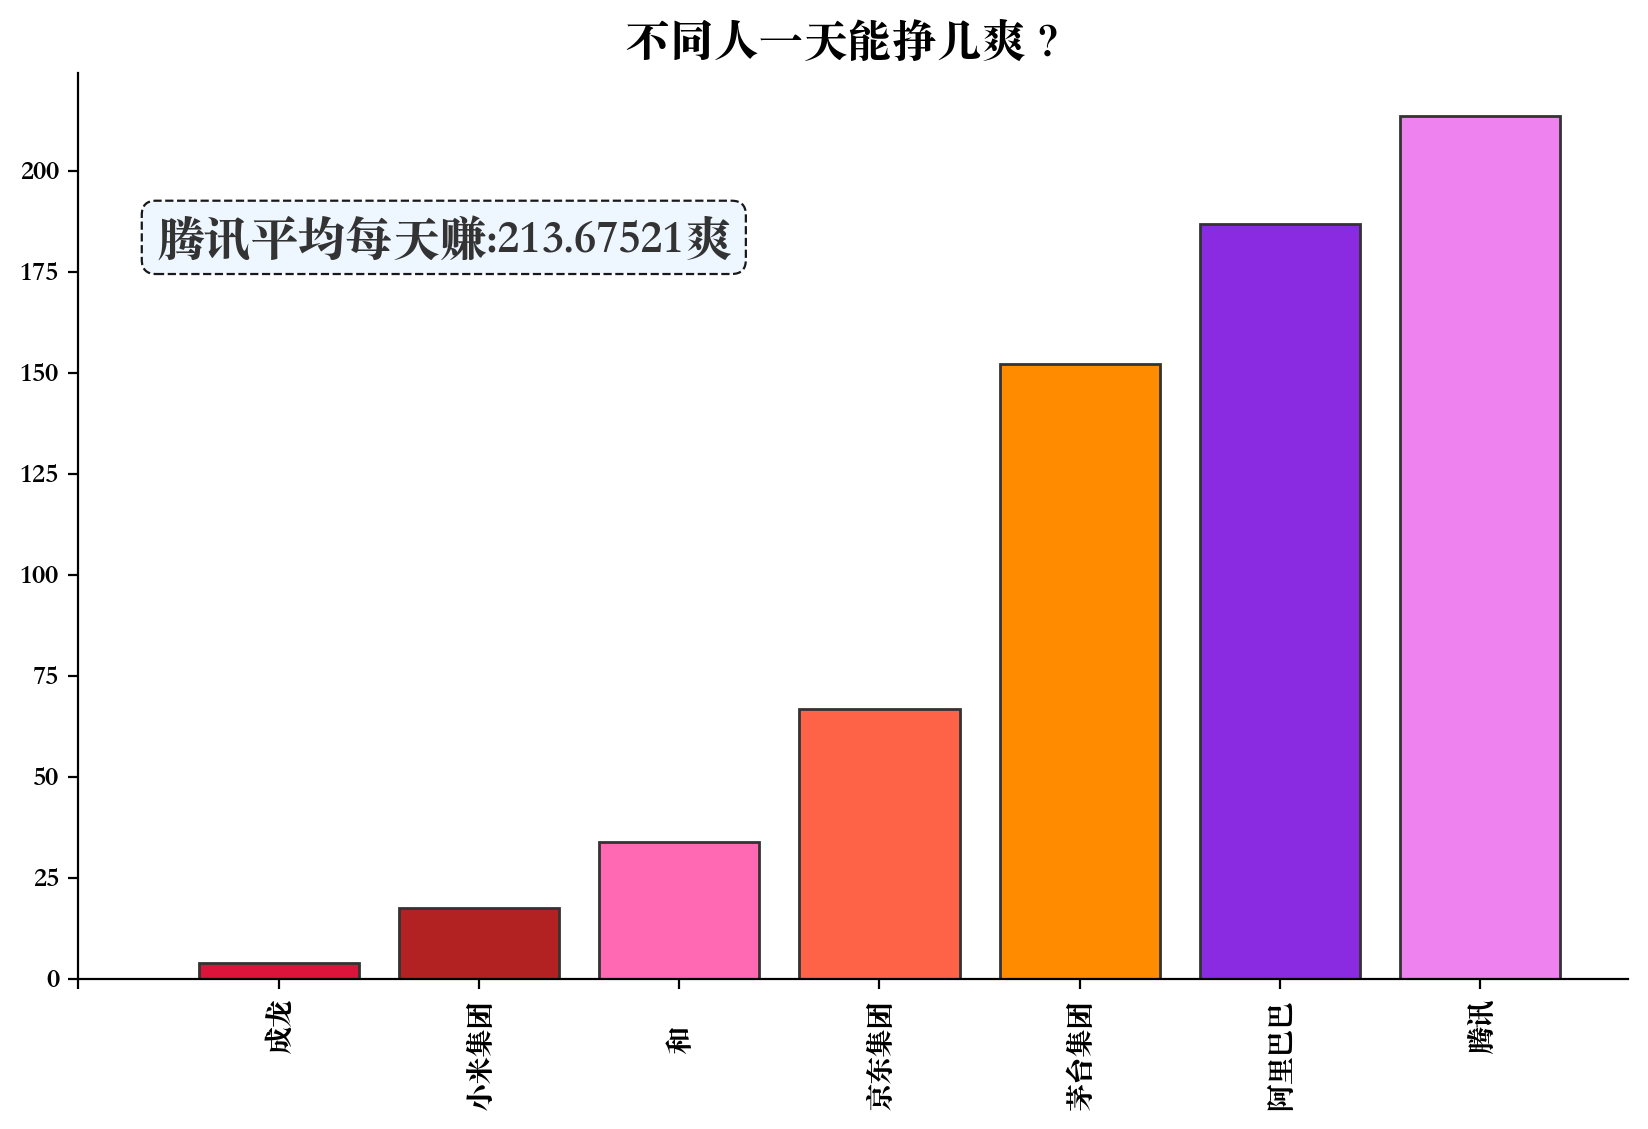

In [18]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [0, 0, 0, 0, 0, 0, 0]
xt = ['', '', '', '', '', '', '', '']
new_color = ['#FFF', '#FFF', '#FFF', '#FFF', '#FFF', '#FFF', '#FFF']


fig, ax = plt.subplots(figsize=(10, 6), dpi=100)


def shuang(flag):
    ax.cla()
    num = '{:.5f}'.format(df.data[flag])
    ax.text(0.05, 0.8, f'{df.name[flag]}平均每天赚:{num}爽', transform=ax.transAxes, ha='left',
            color='#333', bbox=dict(boxstyle="round", fc="#EDF6FF",
                                    ec="black", alpha=0.9, linestyle='--', linewidth=0.8), size=17)
    if flag < 7:

        y[flag] = df.data[flag]
        xt[flag+1] = df.name[flag]
        new_color[flag] = df.color[flag]
        ax.bar(x, y, ec='#333', color=new_color)
        ax.set_title("不同人一天能挣几爽 ？", size=16)
        plt.xticks(range(8), xt, rotation=90, horizontalalignment='center')
        ax.spines['right'].set_color('None')
        ax.spines['top'].set_color('None')

    elif flag > 6:

        y.append(df.data[flag])
        del y[0]

        xt.append(df.name[flag])
        del xt[0]
        xt[0] = ''

        new_color.append(df.color[flag])
        del new_color[0]

        ax.bar(x, y, ec='#333', color=new_color)
        ax.set_title("不同人一天能挣几爽 ？", size=16)

        plt.xticks(range(8), xt, rotation=90, horizontalalignment='center')
        ax.spines['right'].set_color('None')
        ax.spines['top'].set_color('None')


ani = FuncAnimation(fig, shuang, frames=[
                    i for i in range(len(df))], blit=False, interval=1000)

ani.save('shuang.gif', writer='imagemagick', fps=0.8)
# HTML(ani.to_html5_video())
HTML(ani.to_jshtml())

## 静态图

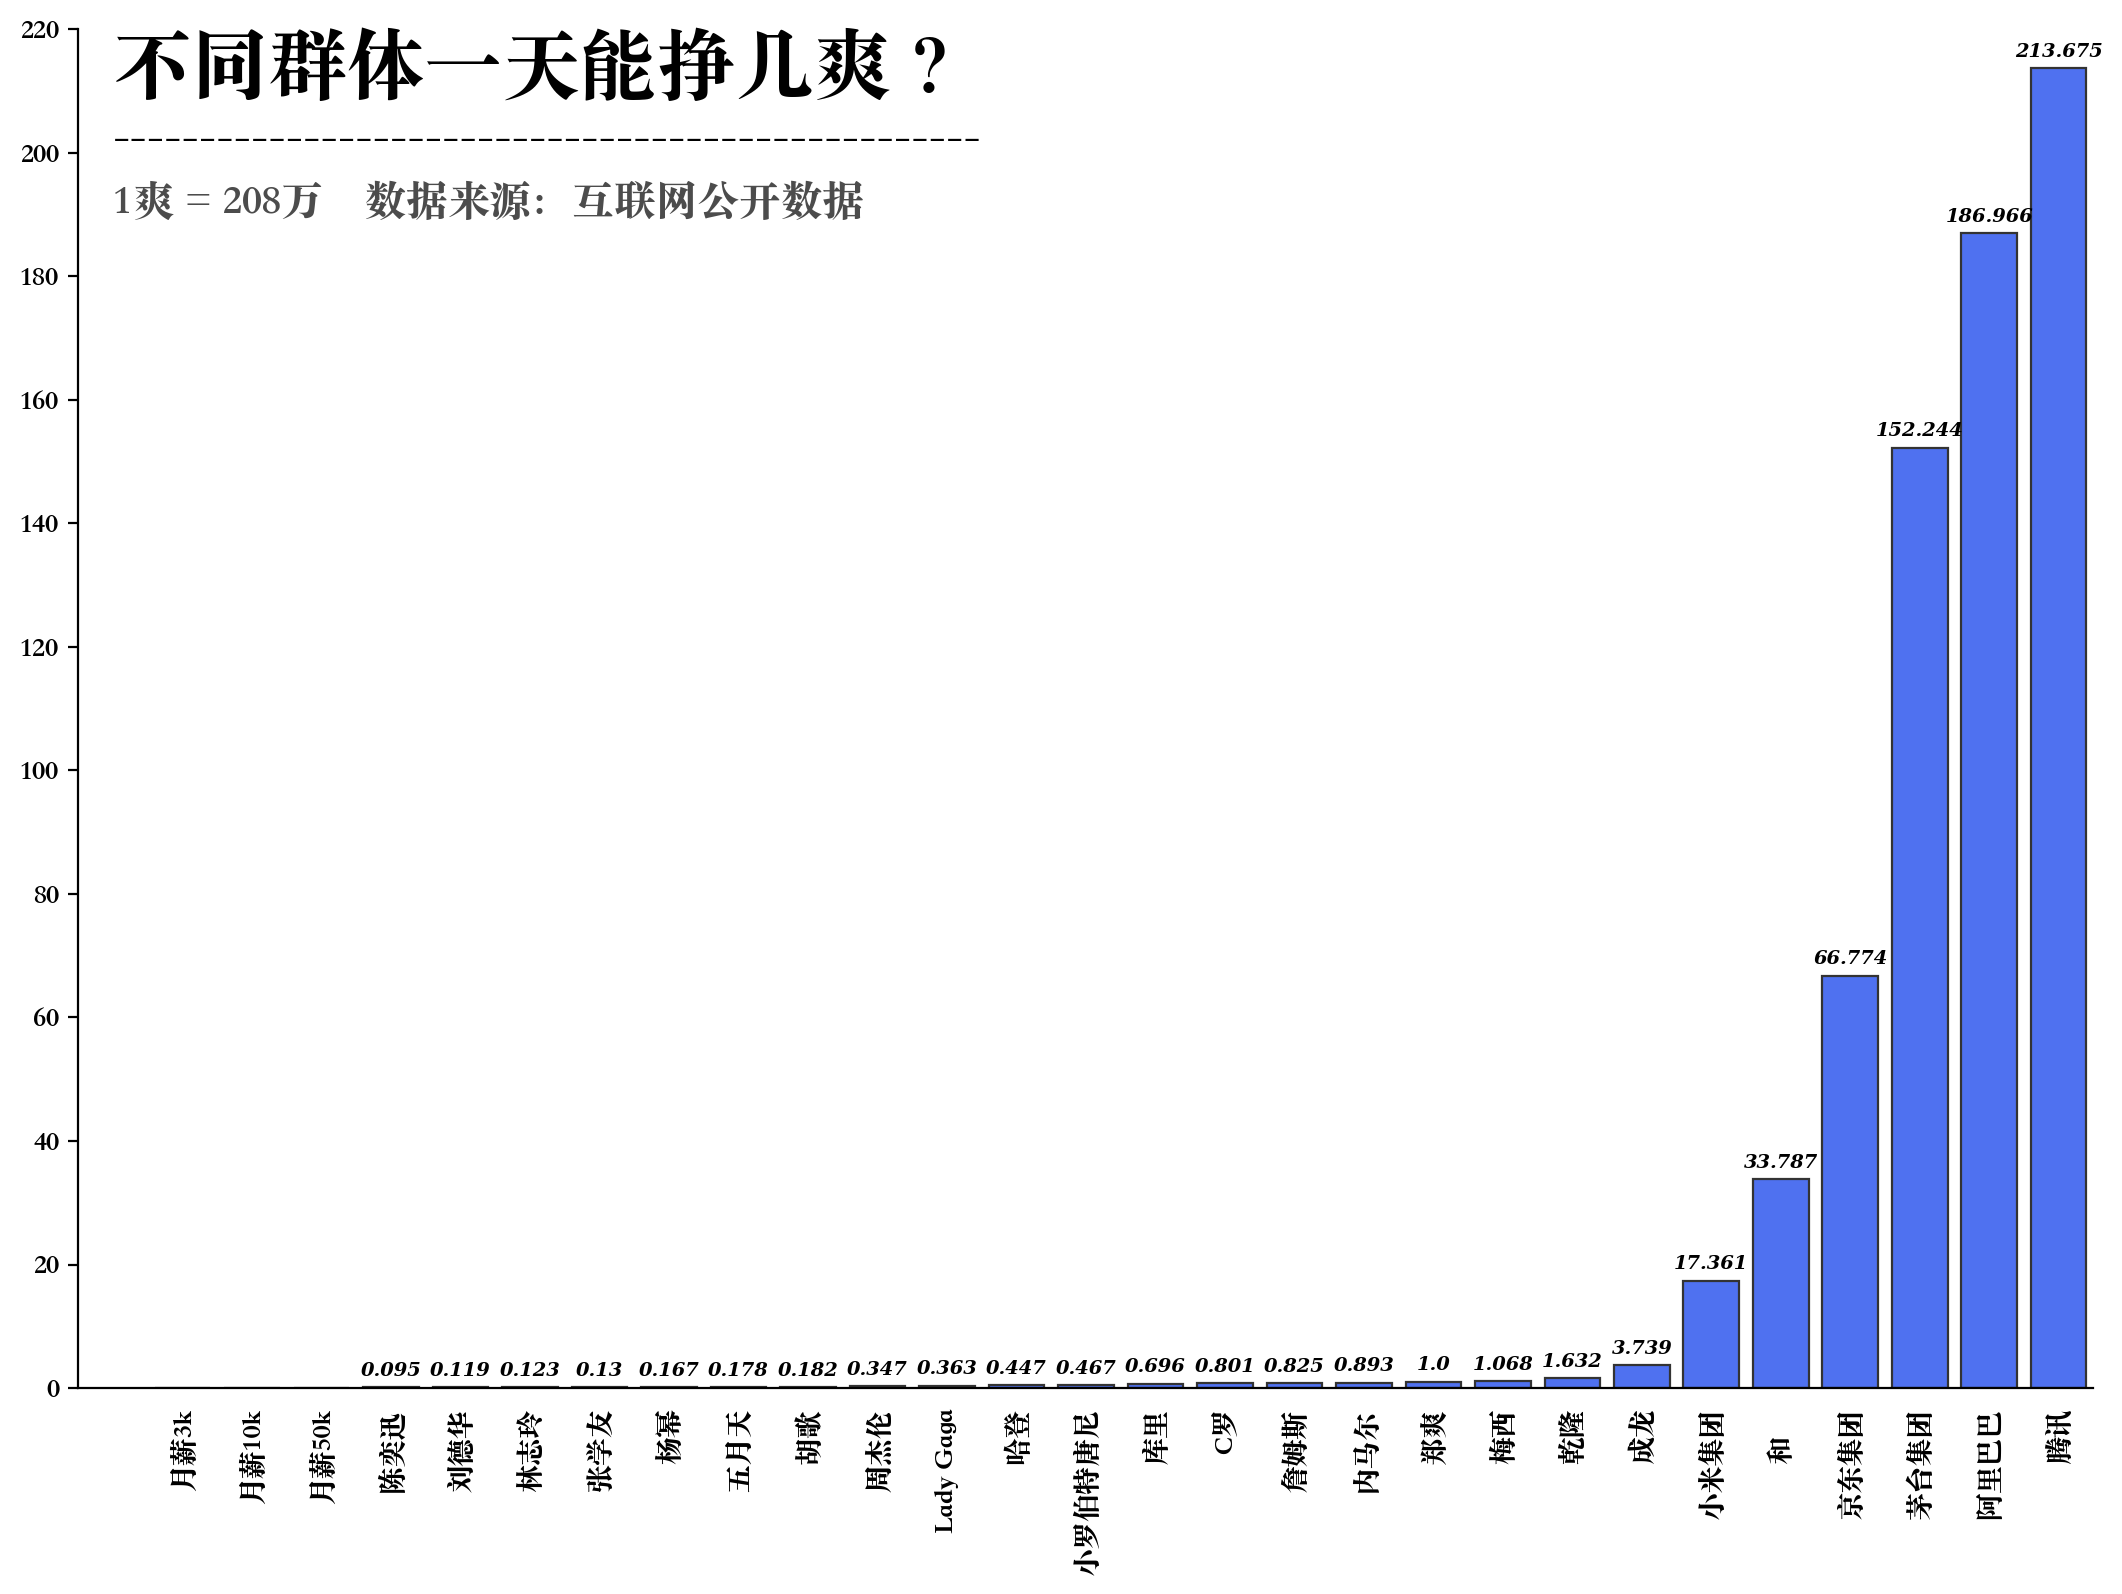

In [19]:
fig, ax = plt.subplots(figsize = (13,9),dpi = 100)
plt.bar([i+1 for i in range(len(df.data))],df.data,color = '#4F71F0', ec='#333', lw=0.8)
plt.text(0,210,"不同群体一天能挣几爽 ？",size = 28)
plt.text(0,200,"-"*50,size = 20)
plt.text(0,190,"1爽 = 208万    数据来源：互联网公开数据",size = 15,alpha = 0.7)
#plt.grid(linewidth=0.5, alpha=0.9, axis='y', linestyle=(0, (10, 3)))


plt.ylim(0,220)
plt.xlim(-0.5,28.5)


for i in range(4,29):
    ax.text(i,df.data[i-1]+2,round(df.data[i-1],3),ha='center',
        style = 'italic',family = 'serif',weight = 'heavy',size =7)

new_xtick = list(df.name)
new_xtick.insert(0,'')

plt.xticks(range(29),new_xtick, rotation=90,
           horizontalalignment='center')  # 修改刻度

ax = plt.gca()

ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')

y_major_locator=MultipleLocator(20)
ax.yaxis.set_major_locator(y_major_locator)

x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

ax.tick_params(bottom=False, top=False, left=True, right=False)
plt.show()

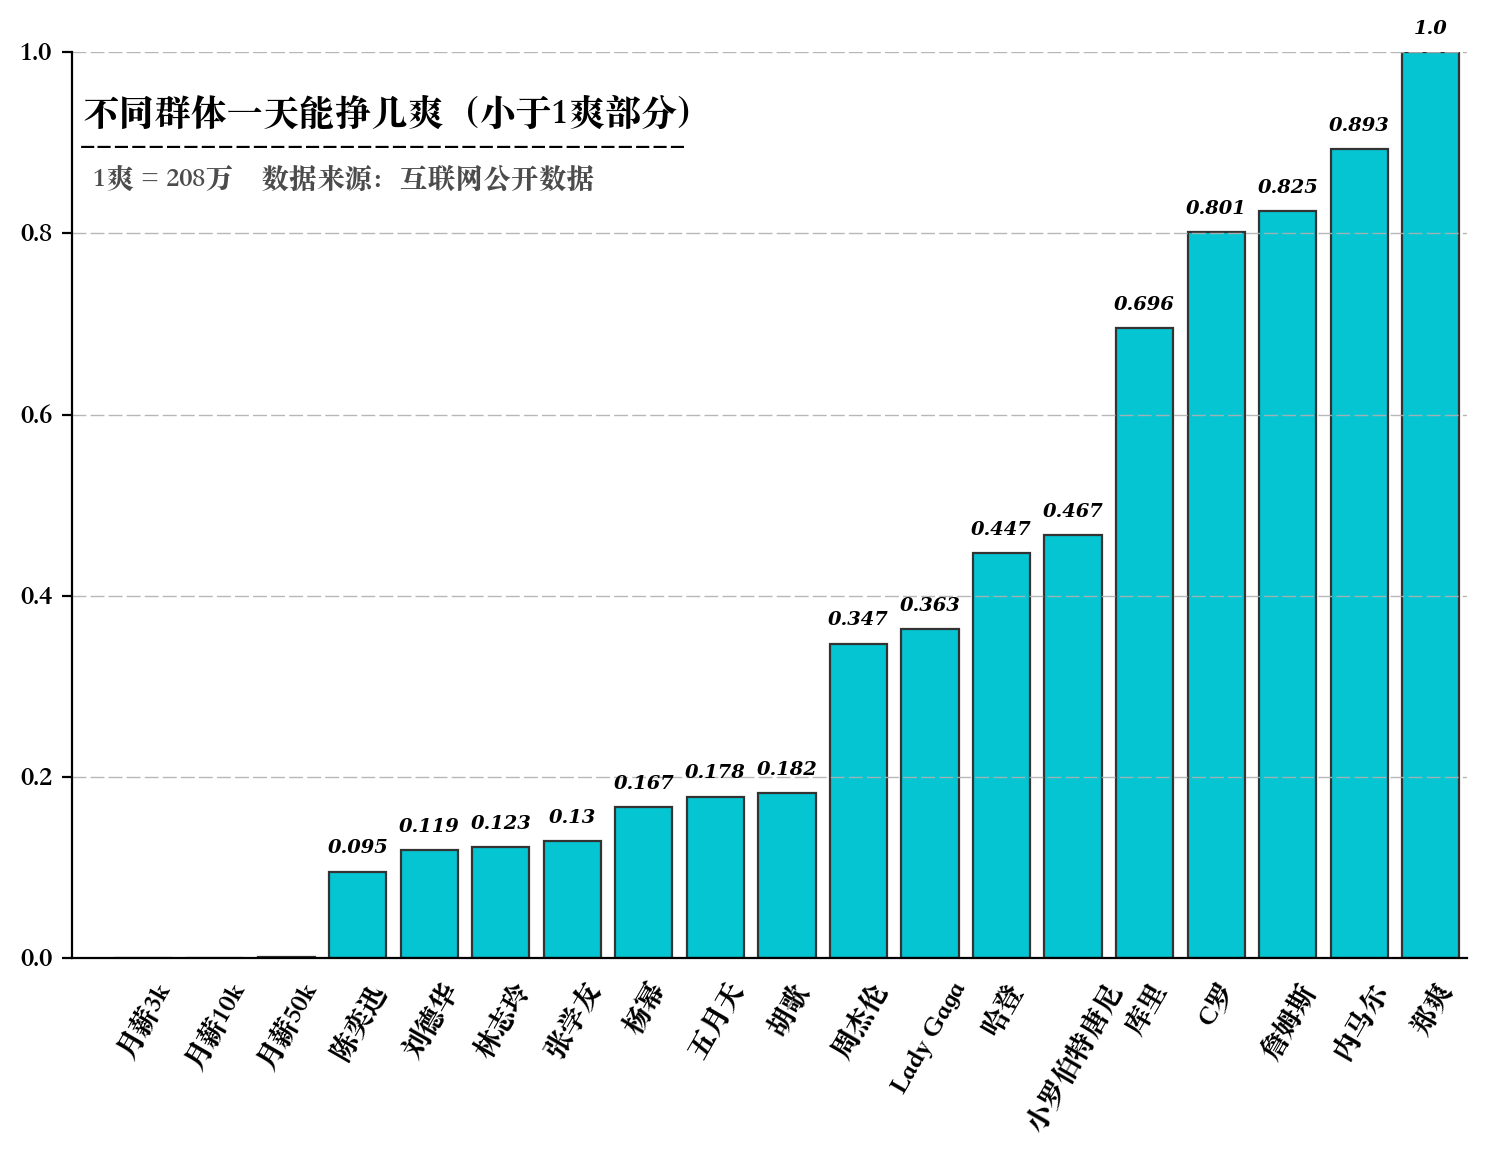

In [20]:
fig, ax = plt.subplots(figsize = (9,6),dpi = 100)

plt.bar([i+1 for i in range(19)],df.data[0:19],color = '#04C5D1', ec='#333', lw=0.8)
plt.text(0.15,0.92,"不同群体一天能挣几爽（小于1爽部分）",size = 13)

plt.text(0.1,0.88,"-"*35,size = 20)
plt.text(0.3,0.85,"1爽 = 208万    数据来源：互联网公开数据",size = 10,alpha = 0.7)
plt.grid(linewidth=0.5, alpha=0.9, axis='y', linestyle=(0, (10, 3)))

plt.ylim(0,1)
plt.xlim(0,19.5)


for i in range(4,20):
    ax.text(i,df.data[i-1]+0.02,round(df.data[i-1],3),ha='center',
        style = 'italic',family = 'serif',weight = 'heavy',size =7)

new_xtick = list(df.name[0:19])
new_xtick.insert(0,'')

plt.xticks(range(20),new_xtick, rotation=60,
           horizontalalignment='center')  # 修改刻度

ax = plt.gca()

ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')


x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

ax.tick_params(bottom=False, top=False, left=True, right=False)



plt.show()